In [1]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Gs = ctl.tf([2, 0],[1, 2, 100])

s = ctl.tf('s')
Gs = 2*s / (s**2+2*s+100)

print(Gs)

Ts = 0.1
Gz = ctl.c2d(Gs, Ts)

print(Gz)




<TransferFunction>: sys[11]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      2 s
---------------
s^2 + 2 s + 100

<TransferFunction>: sys[11]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   0.1526 z - 0.1526
-----------------------
z^2 - 0.9854 z + 0.8187

dt = 0.1



Sempre conferir o periodo de amostragem para transformada Z

In [22]:
num, den = ctl.tfdata(Gz)
num = num[0][0]
den = den[0][0]

print(num[1])
print(den[2])

-0.15255153570204738
0.8187307530779819


o trecho acima retira a aproximação do tf, extremamente nescessario!!

Para transformar uma função de transferencia z para eq. de diferenças, utilizamos a propriedade do atraso (basta pegar o "z" de maior orde e dividir tanto no numetrado quanto no denominador)


EX: 

G(z) = X(z)
      ------
       Y(z)

G(z) =    0,15z - 0,15                   0,15z^-1 - 0,15z^-2
        ----------------      -->     ------------------------
         z^2 - 0,98z +0,8               1 - 0,98z^-1 +0,8z^-2

Y(z) = 0,15z^-1 * X(z) - 0,15z^-2 * X(z) + 0,98z^-1 *Y(z) - 0,81z^-2 * Y(z)

Passando para o tempo (eq. de difereças)

y[k] = 0,15x[k-1] - 0,15x[k-2] + 0,98y[k-1] - 0,81y[k-2]

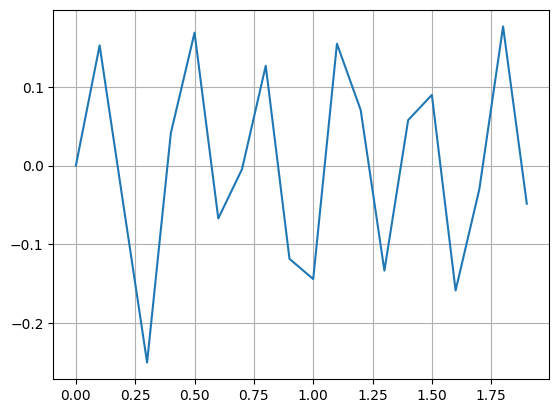

In [12]:
t = np.arange(0, 2, Ts)

m = np.cos(2*np.pi*3*t)

tout,y = ctl.forced_response(Gz, t, m)
plt.figure(1)
plt.clf()
plt.plot(t,y)
plt.grid(True)
plt.show()


ctl.forced_response precisa de uma variavel de tempo de saida e o sinal de saida, ela força uma resposta. Recebe o sistema(func de transf.), o tempo e o sinal de entrada

In [25]:
def sistema(x):
    N = len(x)
    y = np.zeros(N)
    y[0] = 0
    y[1] = 0.1525515357020475*x[0] + 0.9853922461901519 * y[0]

    for k in range(2, N):
        y[k] = 0.1525515357020475 * x[k-1] -0.15255153570204738 *x[k-2] + 0.9853922461901519 * y[k-1] - 0.8187307530779819 * y[k-2]

    return y

os coeficientes tem de ser escritos a mão com todas as casas decimais!!!

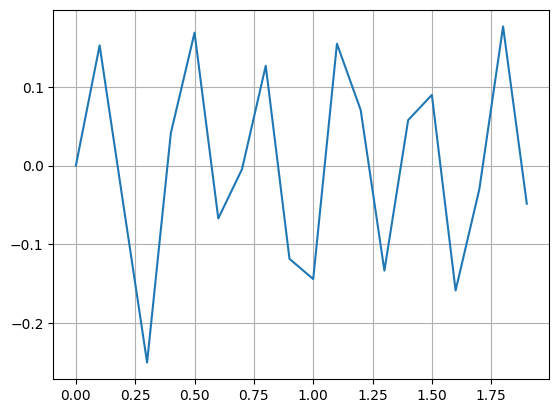

In [26]:
y = sistema(m)

plt.figure(2)
plt.clf()
plt.plot(t,y)
plt.grid(True)
plt.show()

In [27]:
h = np.array([1, 2, -1])
x = np.array([1, -1, 2, 3])

y = np.convolve(x,h)
print(y)

[ 1  1 -1  8  4 -3]


EXERCICIO

In [30]:
Hs = ctl.tf([5.265],[1, 1.455, 5.265])

print(Hs)


Ts = 0.01
Hz = ctl.c2d(Hs,Ts)

print(Hz)

<TransferFunction>: sys[21]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


        5.265
---------------------
s^2 + 1.455 s + 5.265

<TransferFunction>: sys[21]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.000262 z + 0.0002607
----------------------
z^2 - 1.985 z + 0.9856

dt = 0.01



<TransferFunction>: sys[23]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


          5.265
-------------------------
s^3 + 1.455 s^2 + 5.265 s

